## **Immigration to Canada from 1980 to 2013**

## Exploratory Data Analysis

#### References:
* https://www.kaggle.com/datasets/ammaraahmad/immigration-to-canada
* https://www.kaggle.com/code/jimmyoboni/canada-immigration-eda-and-prediction-python
* https://www150.statcan.gc.ca/n1/daily-quotidien/230322/dq230322f-eng.htm#
    

### Setting Up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
colors = plt.cm.tab20c.colors
import matplotlib as mpl
import seaborn as sns
sns.set(style='whitegrid')
print(plt.style.available)
mpl.style.use(['ggplot'])
import folium
from wordcloud import WordCloud, STOPWORDS
import random

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Importing Dataset

In [2]:
df_can = pd.read_csv('../input/immigration-to-canada/canadian_immegration_data.csv')
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


### Data Processing

In [3]:
# Set the 'Country' column as the index
df_can.set_index('Country', inplace=True)

# Converting the column names into strings
df_can.columns = list(map(str, df_can.columns))
years = list(map(str, range(1980, 2014)))

# Review the changes made to our dataframe
print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


### Visualization - Immigrants by Continent

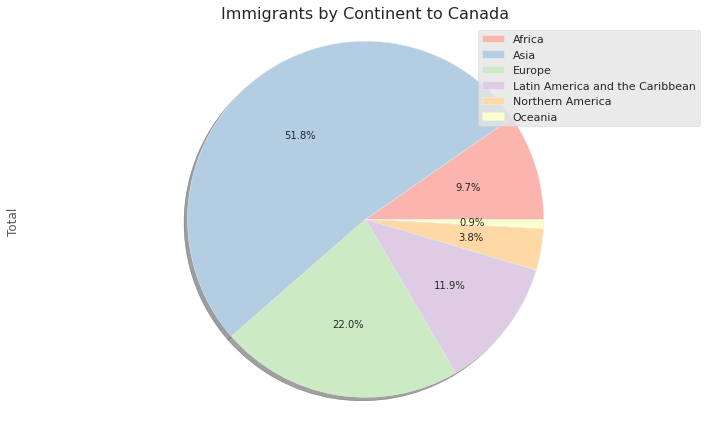

In [4]:
# Group countries by continents and apply the sum() function
df_continent = df_can.groupby('Continent').sum()

# Plotting the pie chart with prettier styles
plt.figure(figsize=(10, 6))

# Define a custom color palette for the pie slices
colors = sns.color_palette('Pastel1', len(df_continent))

# Plot the pie chart
ax = df_continent['Total'].plot(kind='pie', labels=None, autopct='%1.1f%%', colors=colors, shadow=True)

# Add legend and labels
ax.legend(df_continent.index, loc='upper right')
plt.title('Immigrants by Continent to Canada', fontsize=16)
plt.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()

### Visualization - Immigrants by Development Category

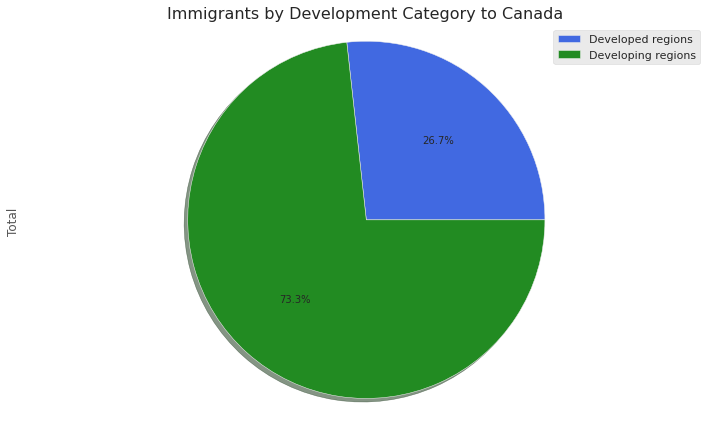

In [5]:
# Group by development category and apply the sum() function
df_dev = df_can.groupby('DevName').sum()

# Plotting the pie chart with prettier styles
plt.figure(figsize=(10, 6))

# Define a custom color palette for the pie slices
colors = ['royalblue', 'forestgreen', 'orange', 'purple', 'red']

# Plot the pie chart
ax = df_dev['Total'].plot(kind='pie', labels=None, autopct='%1.1f%%', colors=colors, shadow=True)

# Add legend and labels
ax.legend(df_dev.index, loc='upper right')
plt.title('Immigrants by Development Category to Canada', fontsize=16)
plt.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()

### Visualization - Top 5 Countries

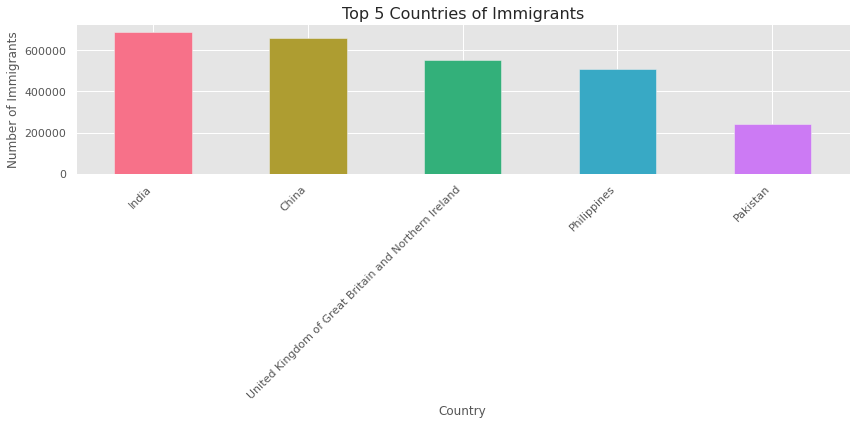

In [6]:
# Select the top 5 countries and sum the total immigrants
df_can_top5 = df_can.nlargest(n=5, columns='Total')
df_can_top5 = df_can_top5.groupby('Country').sum()

# Plotting the bar chart with prettier styles
plt.figure(figsize=(12, 6))
colors = sns.color_palette('husl', len(df_can_top5))

# Plot the bar chart
ax = df_can_top5['Total'].sort_values(ascending=False).plot(kind='bar', color=colors)

# Adding title and labels
plt.title('Top 5 Countries of Immigrants', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Immigrants', fontsize=12)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

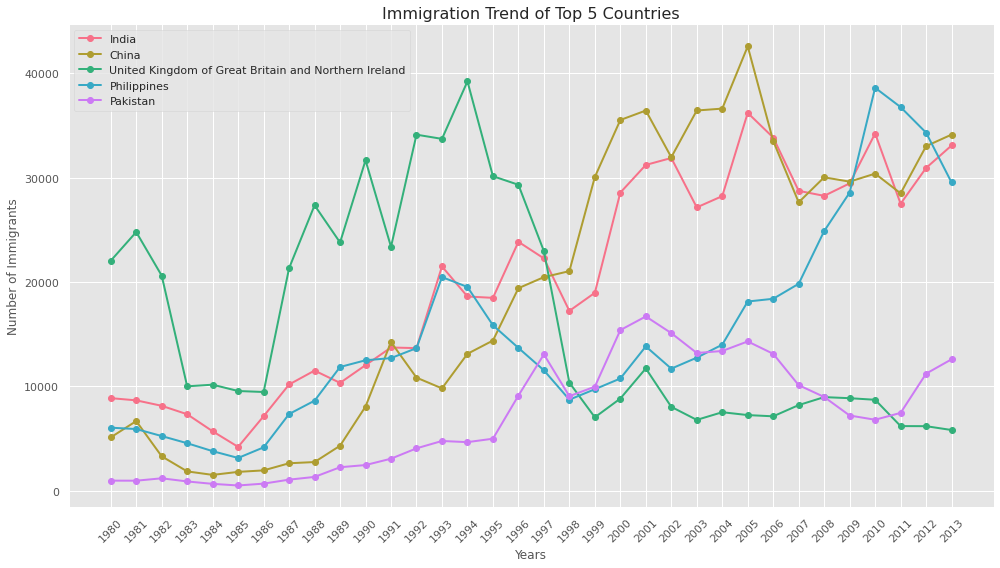

In [7]:
# Sort by Total immigration in descending order
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# Select the top 5 countries
df_top5 = df_can.head(5)

# Transpose the DataFrame for plotting
df_top5 = df_top5[years].transpose()

# Plotting the line chart with prettier styles
plt.figure(figsize=(14, 8))

# Define a custom color palette for the lines
colors = sns.color_palette('husl', df_top5.shape[1])

# Plot the lines for each country
for i, country in enumerate(df_top5.columns):
    plt.plot(df_top5.index, df_top5[country], label=country, color=colors[i], linewidth=2, marker='o')

# Add legend and labels
plt.legend()
plt.title('Immigration Trend of Top 5 Countries', fontsize=16)
plt.ylabel('Number of Immigrants', fontsize=12)
plt.xlabel('Years', fontsize=12)

# Rotate x-ticks for better display
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


### Visualization - Bottom 5 Countries

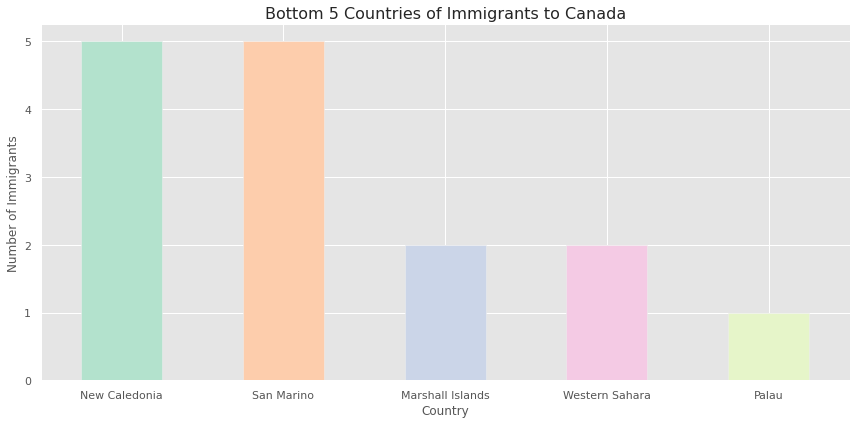

In [8]:
# Select the bottom 5 countries and sum the total immigrants
df_can_btm5 = df_can.nsmallest(n=5, columns='Total')
df_can_btm5 = df_can_btm5.groupby('Country').sum()

# Plotting the bar chart with prettier styles
plt.figure(figsize=(12, 6))

# Define a custom color palette for the bars
colors = sns.color_palette('Pastel2', len(df_can_btm5))

# Plot the bar chart
ax = df_can_btm5['Total'].sort_values(ascending=False).plot(kind='bar', color=colors)

# Adding title and labels
plt.title('Bottom 5 Countries of Immigrants to Canada', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Immigrants', fontsize=12)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

# Display the plot
plt.tight_layout()
plt.show()

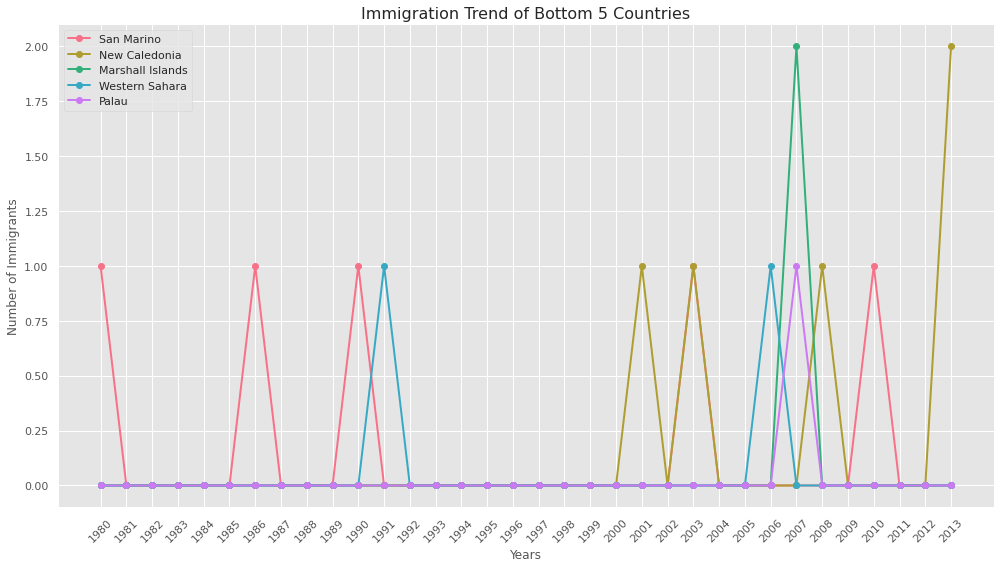

In [9]:
# Sort by Total immigration in ascending order for bottom 5
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# Select the bottom 5 countries
df_bttm5 = df_can.tail(5)

# Transpose the DataFrame for plotting
df_bttm5 = df_bttm5[years].transpose()

# Plotting the line chart with prettier styles
plt.figure(figsize=(14, 8))

# Define a custom color palette for the lines
colors = sns.color_palette('husl', df_bttm5.shape[1])

# Plot the lines for each country
for i, country in enumerate(df_bttm5.columns):
    plt.plot(df_bttm5.index, df_bttm5[country], label=country, color=colors[i], linewidth=2, marker='o')

# Add legend and labels
plt.legend()
plt.title('Immigration Trend of Bottom 5 Countries', fontsize=16)
plt.ylabel('Number of Immigrants', fontsize=12)
plt.xlabel('Years', fontsize=12)

# Rotate x-ticks for better display
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Visualization - Top 15 Countries

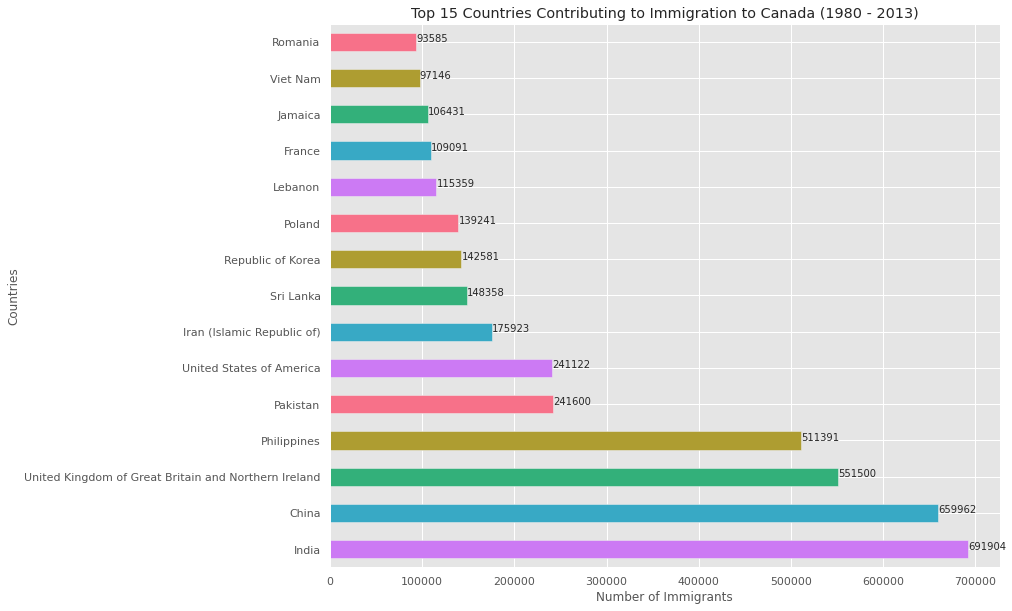

In [10]:
# creating top15 dtaframe
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)

# Sort the dataframe in descending order for better visualization
df_top15 = df_top15.sort_values(ascending=True)

# Plotting a horizontal bar chart
plt.figure(figsize=(12, 10))
ax = df_top15.plot(kind='barh', color=colors)

# Add labels and title
plt.xlabel('Number of Immigrants')
plt.ylabel('Countries')
plt.title('Top 15 Countries Contributing to Immigration to Canada (1980 - 2013)')

# Add annotations to the bars
for index, value in enumerate(df_top15):
    plt.text(value, index, str(value))

# Invert the y-axis for a better layout
plt.gca().invert_yaxis()

# Display the plot
plt.show()

<Figure size 720x432 with 0 Axes>

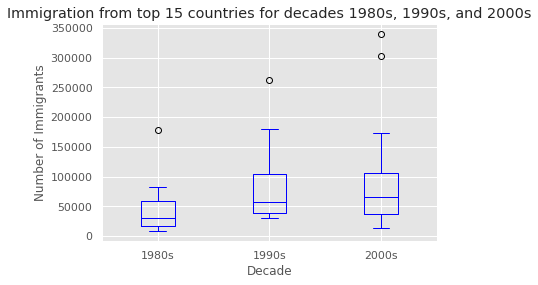

In [11]:
# Select the top 15 countries by total immigration
df_top15 = df_can.nlargest(15, 'Total')

# Define the years for each decade
decades = {'1980s': range(1980, 1990), '1990s': range(1990, 2000), '2000s': range(2000, 2010)}

# Calculate immigration for each decade
decade_immigration = {decade: df_top15[map(str, years)].sum(axis=1) for decade, years in decades.items()}

# Create a DataFrame for the decades
new_df = pd.DataFrame(decade_immigration)

# Plotting a box plot for each decade
plt.figure(figsize=(10, 6))
new_df.plot(kind='box', color='blue')
plt.title('Immigration from top 15 countries for decades 1980s, 1990s, and 2000s')
plt.xlabel('Decade')
plt.ylabel('Number of Immigrants')
plt.show()

### Visualization - Total Immigration to Canada from 1980 - 2013

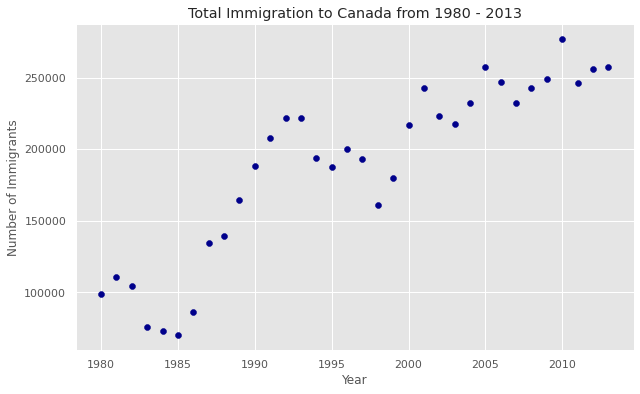

In [12]:
# Calculate total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# Convert years to integer type (useful for regression later on)
df_tot.index = df_tot.index.astype(int)

# Reset the index to put it back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# Rename columns
df_tot.columns = ['year', 'total']

# Plotting a scatter plot for total immigration per year
plt.figure(figsize=(10, 6))
plt.scatter(df_tot['year'], df_tot['total'], color='darkblue')

# Add labels and title
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Display the plot
plt.show()

### Prediction - Linear Regression

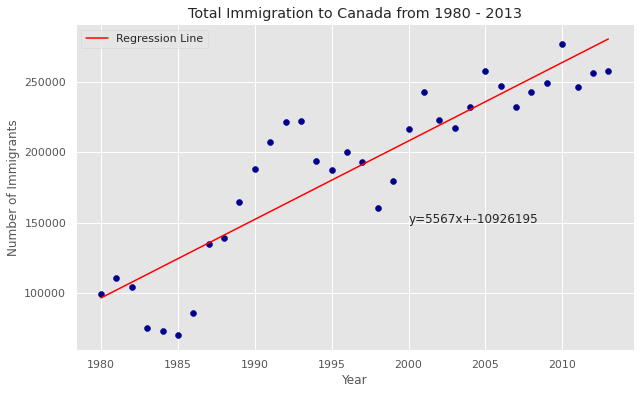

No. Immigrants = 5567 * Year + -10926195


In [13]:
# Calculate the regression line
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)

# Plotting the scatter plot and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='darkblue')  # Scatter plot
plt.plot(x, fit[0] * x + fit[1], color='red', label='Regression Line')  # Regression line
plt.annotate('y={0:.0f}x+{1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000), fontsize=12)  # Annotation

# Add labels and title
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Display the plot
plt.legend()
plt.show()

# Print out the equation of the regression line
equation = 'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1])
print(equation)

Using the equation of the line of best fit, we can estimate the number of immigrants in 2022:

No. Immigrants = 5567 * Year - 10926195

No. Immigrants = 5567 * 2022 - 10926195

No. Immigrants = 335,699

When compared to the actual data for 2022 from [Statistics Canada](https://www150.statcan.gc.ca/n1/daily-quotidien/230322/dq230322f-eng.htm#), we see that Canada accepted approximately 437,180 immigrants in 2022. Our estimated value of 335,699 is about 23% lower than the actual number, indicating that a simple linear correlation cannot be used in this case, especially when we don't have the detailed data from 2014 to 2021. More importantly, many uncertain variables can affect the immigration trend, including politics, climate, etc.
When comparing our estimated immigration count for 2022 using the linear regression model to the actual data reported by [Statistics Canada](https://www150.statcan.gc.ca/n1/daily-quotidien/230322/dq230322f-eng.htm#), we observe a significant disparity. Canada reported approximately 437,180 immigrants in 2022, while our linear regression estimate was 335,699. This indicates that a simple linear correlation, as derived from the data we have up to 2013, does not accurately capture the complexity of immigration trends, particularly for the years beyond our original dataset (2014-2021).

Several factors contribute to this discrepancy. First, the linear model assumes a constant rate of change, which is an oversimplification of real-world immigration dynamics. Second, the absence of detailed data from 2014 to 2021 prevents a more precise estimation that aligns with the actual numbers. Lastly, numerous uncertain variables, such as political changes, climate factors, economic conditions, and global events, influence immigration trends. These variables are difficult to account for in a linear model and emphasize the need for a more sophisticated analysis when projecting immigration patterns in the future.


### Word Cloud <a class="anchor" id="wc"></a>

Colombia Morocco Egypt Portugal Guyana Haiti Romania Jamaica France Lebanon Poland Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines China China China China China China China China China India India India India India India India India India 


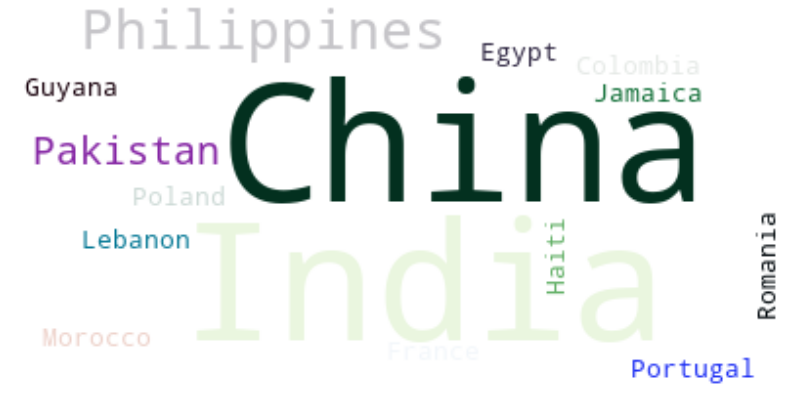

In [14]:


# Set up stopwords
stopwords = set(STOPWORDS)

# Calculate total immigration
total_immigration = df_can['Total'].sum()

# Set the maximum number of words for the WordCloud
max_words = 90
word_string = ''

# Generate the word string based on immigration numbers for each country
for country in df_can.index.values:
    # Check if the country's name is a single-word name
    if country.count(" ") == 0:
        # Determine the number of times the country name will be repeated based on immigration proportion
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigration * max_words)
        word_string += ((country + ' ') * repeat_num_times)

# Display the generated text
print(word_string)

# Create a custom color function for the WordCloud
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * random.random())
    s = int(100.0 * random.random())
    l = int(100.0 * random.random())
    return "hsl({}, {}%, {}%)".format(h, s, l)

# Create the WordCloud with a custom color function
wordcloud = WordCloud(background_color='white', color_func=random_color_func).generate(word_string)

# Display the WordCloud
plt.figure(figsize=(14, 18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()